# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('human_body_temperature.csv')

In [4]:
#Loading Important EDA Programs
def ecdf(data):
    """takes numpy array data, sorts it and gives x and y values for plotting.
    Output is two values, x and y."""
    # Number of data points:
    n = len(data)
            
    # ECDF x data:
    x = np.sort(data)
    
    # ECDF y data:
    y = np.arange(1, n+1)/n
    
    return x,y

In [5]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [6]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [60]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [61]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

**1)  Is the distribution of body temperature normal?**

In [7]:
# First step is to look at the data.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
# Getting Bin Count for Historgram Plot
n_data = len(df.temperature)
n_bins= np.sqrt(n_data)
n_bins= int(n_bins)
print(n_bins)

11


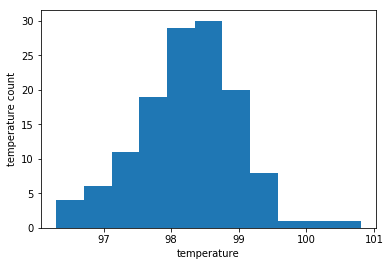

In [9]:
# Plot Temperature
_ = plt.hist(df.temperature, bins = n_bins)
_ = plt.xlabel('temperature')
_ = plt.ylabel('temperature count')
plt.show()

In [10]:
# The graph looks to be normally distributed.  Let's confirm by computing the theoretical CDF
mean= np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size =10000) 
x, y =ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

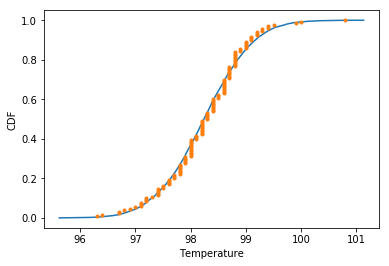

In [11]:
# Plot Data to Confirm Normality
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
plt.show()

**Answer:**  Yes, temperature is normally distributed.

**2) Is the sample size large?  Are observations independent?**

We already know that the samples are independent.  Each observation is from a different person, which does should not effect the observation of another person's temperature and heart rate.<br>
The only thing we need to check now is if the sample size is considered large.<br>
A large enough sample for the Central Limit Theory is 30 independent observations.<br>
Let's review out data to find out!

In [12]:
# Print the amount of temperature samples taken.
print(len(df.temperature))

130


**Answer:**  Yes, the sample size is large and the observations are independent.

**3) Is the true population mean really 98.6 degrees F?**

In [13]:
# As guided, let's do a bootstrap hypothesis test!

# Shift the Data
real_mean= np.mean(df.temperature)

mean_shifted = df.temperature - real_mean + 98.6 

# Find Difference and Create Difference Functions
def diff_from_98(data, temp=98.6):
    return np.mean(data)-temp

diff = diff_from_98(df.temperature)

# Printing Real Mean to Calculate P-Value
print(real_mean)

98.24923076923078


In [14]:
# Draw Bootstrap Replicates
bs_reps = draw_bs_reps(mean_shifted, diff_from_98, 10000)

# Calculate P Value 
# Reps should be summed as less than or equal to the difference because the real mean is less than 98.6
p = np.sum(bs_reps <= diff) /10000

print(p)


0.0


We will now follow up with a one-sample z-test.  This is the appropriate frequentist test because the population is sufficiently large (over 30) and we are using a single sample for our data.


In [15]:
# Z-Test
n = len(df.temperature)
xbar = np.mean(df.temperature)
o = np.std(df.temperature)
se = o/(np.sqrt(n))
z = (98.6-xbar)/se
print(z)

5.47592520208


Based on this z score, 98.6 degrees F is over 5 standard deviations away from the mean!

In [16]:
# T-Test
n = len(df.temperature)
xbar = np.mean(df.temperature)
o = np.std(df.temperature)
se = o/(np.sqrt(n))
t = (98.6-xbar)/se
print(t)

5.47592520208


The result for the t-test is not very much different than the z-test.  Both are calculated in a similar fashion, and both indicate that 98.6 is way outside of the probability.

**Answer:*** No, 98.6 degrees F is not the true population mean.

**4) Draw a small sample of size 10 from the data and repeat both frequentist tests.**

In [25]:
#Drawing Sample of Ten from the Data
np.random.seed(42)
permuted_data = np.random.permutation(df.temperature)
df10 = permuted_data[:10]


**Answer Part 1:** The correct test to use here is the t-test because the sample size is less than 30 and thus, we cannot assume it is normally distributed.

In [28]:
# T-Test
n = len(df10)
xbar = np.mean(df10)
o = np.std(df10)
se = o/np.sqrt(n)
t = (98.6-xbar)/se
print(t)

1.64503705932


When reviewing this t-score with a t-table it appears that there is close to a 93.28% chance that the temperature is no more than 98.6 degrees.

In [29]:
# Z-Test
n = len(df10)
xbar = np.mean(df10)
o = np.std(df10)
se = o/np.sqrt(n)
z = (98.6-xbar)/se
print(z)

1.64503705932


**Answer Part 2:** When reviewing this z-score, there is a 94.95% chance that the temperature is less than 98.6 degrees.<br>
I've noticed that there is not a strong difference between z and t scores.

**5) At what temperature should we consider someone's temperature to be "abnormal"?** 

In [ ]:
# Using Bootstrap Method to Calculate the 95% Confidence Interval
bs_reps = draw_bs_reps(df.temperature, np.mean, size=10000)
np.percentile(bs_reps,[2.5,97.5])

In [40]:
# Calculating the Margin of Error for 95% Confidence Interval
se = np.std(df.temperature)/np.sqrt(len(df))
crit_val = 1.96
moe = se*crit_val


In [41]:
# Using Margin of Error to Calculate the Frequentist 95% Confidence Interval
f_percentile = [real_mean-moe, real_mean+moe]
f_percentile

[98.123679804428193, 98.374781734033363]

**Answer:** Temperatures below 98.12 and above 98.37 are considered abnormal.

**6) Is there a significant difference between males and females in normal temperature?**

To discover if there is a difference between male and female temperatures, I will separate the two categories into their own dataframes.  Next, I will graph the data into histograms to get a visual perspective.  After that, I will do a permutation test to see if there is a significant difference in the means.  Finally I will run a boostrap test to check if there is a significant difference in the distribution.

In [79]:
# Separating Data into Male and Female Dataframes and Calculating Bin Count
male = df[df.gender=='M']
female = df[df.gender=='F']

# Male Bins
m_data = len(male.temperature)
m_bins= np.sqrt(m_data)
m_bins= int(m_bins)

# Female Bins
f_data = len(female.temperature)
f_bins= np.sqrt(f_data)
f_bins= int(f_bins)
print(m_bins, f_bins)

8 8


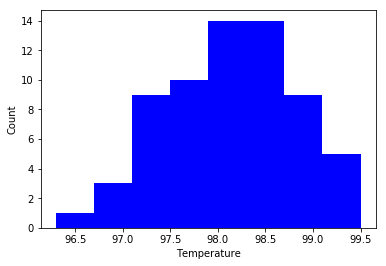

In [52]:
# Plotting Male Data
_ = plt.hist(male.temperature, color = 'blue', bins = m_bins)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Count')
plt.show()

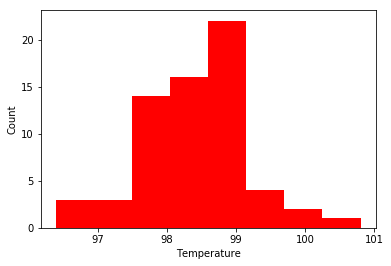

In [53]:
# Plotting Female Data
_ = plt.hist(female.temperature, color = 'red', bins = f_bins)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Count')
plt.show()

At first glace it appears that females have a higher max temperature and about the same min temperature as males.  However, Males appear to have a larger spread of variation.  Let's run some hypothesis tests!

In [55]:
def diff_o_means(data1, data2):
    '''Calculates the difference of means in two arrays'''
    diff = np.mean(data1) - np.mean(data2)
    return diff


In [73]:
# Permutation Test for Difference of Means

edm = diff_o_means(female.temperature, male.temperature)
perm_reps = draw_perm_reps(male.temperature, female.temperature, diff_o_means,10000)
p = np.sum(perm_reps >= edm)/ len(perm_reps)
p

0.011299999999999999

It appears that there is a statistically significant difference between the average male and female body temperature.

In [78]:
# Let's See if the Distributions are Statistically Significant Using a Bootstrap Hypothesis Test
bs_reps = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(df.temperature,size=len(df))
    bs_reps[i] = diff_o_means(bs_sample[:len(male)], bs_sample[len(male):])


p = np.sum(bs_reps >= edm)/len(bs_reps)
p

0.0115

It appears that there is a statistically significant difference between the distribution of male and female body temperatures.

**Answer:** Yes, there is a signficant difference between male and female body temperatures.

**Final Story/Answer:**  The mean normal body temperature was held to be 98.6 ∘F for more than 120 years<br>

However, after reviewing the data statistically, this appears to be inaccurate.  Not only is the average body temperature more than .3 degrees cooler, an average body temperature of 98.6 degrees is considered abnormally high.<br>

Furthermore, a single normal body temperature is not a one size fits all calculation.  As was demonstrated in this analysis, there are statistically significant differences between the average body temperatures of women and men.<br>

In conclusion, it is time we leave 98.6 120 years in the past, and move forward with 98.1 to 98.3.